In [17]:
# Import dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
import multihash as mh
from cid import make_cid

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10, 6)

db_con = psycopg2.connect(
    host="localhost",
    port="5432",
    database="cid_hoarder_test",
    user="hoarder",
    password="password")

In [18]:
cids = pd.read_sql_query("""
SELECT cid_hash from cid_info;
""", db_con)

# get multihash from the CID b58 string()
cids['multihash'] = cids.apply(lambda row: make_cid(row['cid_hash']).multihash ,axis=1)

# get the int of the multihash.hash()
cids['hash_int'] = cids.apply(lambda row: int.from_bytes( mh.decode(row['multihash']).digest, byteorder="big") ,axis=1)

sha256 = (2 ** 256) -1
# normalize multihash.hash() in int in sha256 space
cids['hash_int_norm'] = cids.apply(lambda row: row['hash_int'] / sha256 ,axis=1)

ordered_cids = cids.sort_values('hash_int_norm')


Text(0.5, 1.0, 'CID CDF in the SHA256 hash-space')

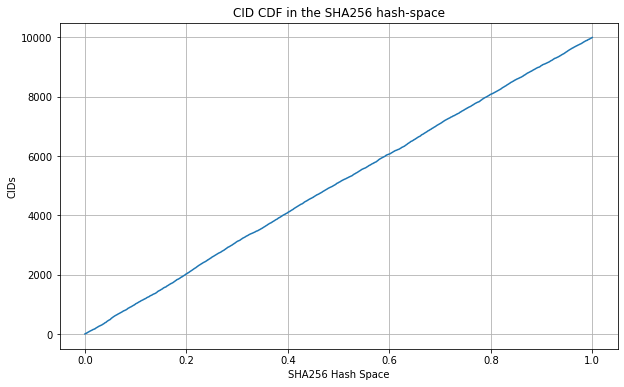

In [19]:
plt.plot(ordered_cids['hash_int_norm'], np.linspace(0, len(ordered_cids['hash_int_norm']), len(ordered_cids['hash_int_norm'])))
plt.grid()
plt.xlabel('SHA256 Hash Space')
plt.ylabel('CIDs')
plt.title('CID CDF in the SHA256 hash-space')


Text(0.5, 1.0, 'CID Distribution in the SHA256 Hash Space')

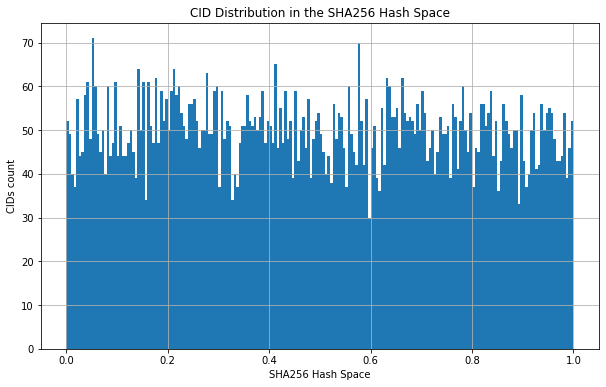

In [16]:
BINS = 200 # KBUCKETs
plt.hist(ordered_cids['hash_int_norm'], bins=BINS)
plt.grid()
plt.xlabel('SHA256 Hash Space')
plt.ylabel('CIDs count')
plt.title('CID PDF in the SHA256 Hash Space')
